# UTS






Konsep K-NN
k-NN (k-Nearest-Neighbors) merupakan sebuah algoritma yang digunakan untuk menentukan sebuah label dari data labeh yang sudah tersedia. k-NN ini memeliki 5 algoritma yang digunakan

1. Menentukan nilai K
2. Menghitung jarak antara data uji dengan data latih (menggunakan Minkowski Distance)
3. Mengurutkan jarak dari terkecil hingga terbesar (Ascending)
4. Mengambil data sebanyak K terdekat
5. Memilih kelas

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/dickyardianto08/dataset/main/dataR2.csv')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Pisahkan dataset menjadi input (X) dan target (y). Input adalah setiap kolom kecuali ‘variety’ karena ‘variety’ adalah apa yang akan coba diprediksi. Oleh karena itu, ‘variety’ akan menjadi target.

In [ ]:
#create a dataframe with all training data except the target column
X = data.drop(columns=["Classification"])
#check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
#separate target values
y = data["Classification"].values
#view target values
y[0:150]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

Memisahkan dataset menjadi train dan test data

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

Membuat Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Testing Model

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.3333333333333333

K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


Hypertuning model parameters using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5173913043478261

# Desision Tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
# Reading the dataset file
df = pd.read_csv('https://raw.githubusercontent.com/dickyardianto08/dataset/main/dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
y = df["Classification"]
X = df.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

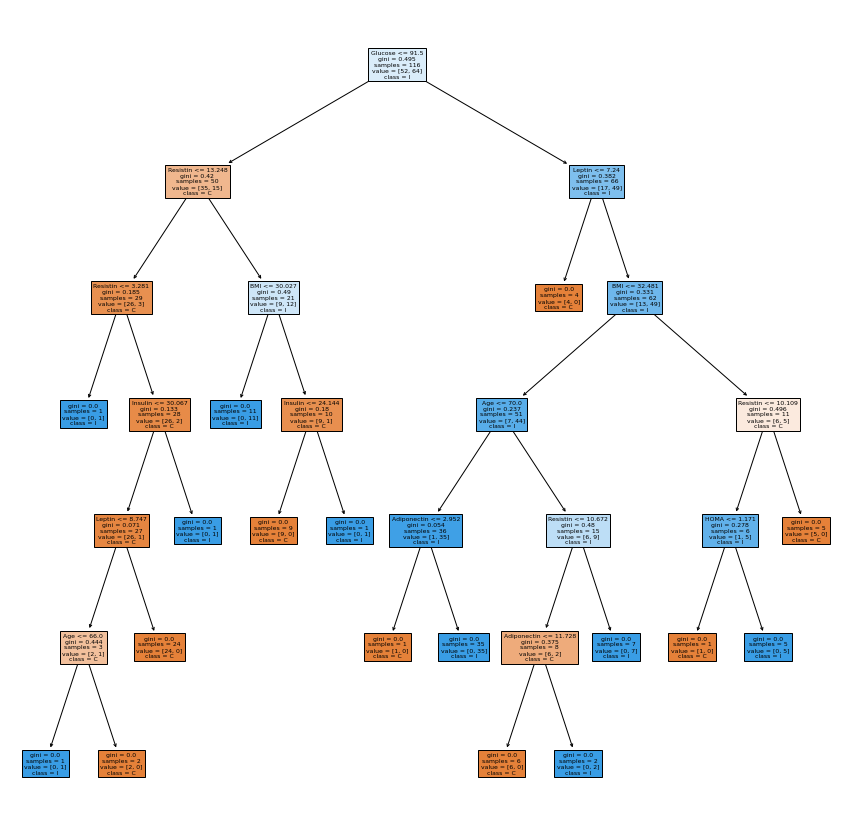

In [ ]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, feature_names=list(df.columns.values)[:9], class_names=list(df.columns.values)[9] ,filled=True)